## 安裝套件

In [1]:
!pip install requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2020-09-01 23:24:36--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2020-09-01 23:24:37--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  --.-KB/s    in 0.07s   

2020-09-01 23:24:39 (123 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [9]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'feed': {'title': '經濟日報',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
   'value': '經濟日報'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://money.udn.com'}],
  'link': 'https://money.udn.com',
  'subtitle': '經濟日報(https://money.udn.com)每日透過專業記者群，將即時、熱點、國際、行情、證券、兩岸、產業、酷科技、生技、理財、房產、品味、觀點及商情等等最新資訊彙整成當天重要新聞，提供最新最精闢的內容，為工商業界每日必讀的新聞網站。',
  'subtitle_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
   'value': '經濟日報(https://money.udn.com)每日透過專業記者群，將即時、熱點、國際、行情、證券、兩岸、產業、酷科技、生技、理財、房產、品味、觀點及商情等等最新資訊彙整成當天重要新聞，提供最新最精闢的內容，為工商業界每日必讀的新聞網站。'},
  'published': 'Tue, 01 Sep 2020 23:10:17 +0800',
  'published_parsed': time.struct_time(tm_year=2020, tm_mon=9, tm_mday=1, tm_hour=15, tm_min=10, tm_sec=17, tm_wday=1, tm_yday=245, tm_isdst=0),
  'rights': '聯合線上公司著作權所有@copy; udn.com. All Rights Reserved.',
  'rights

### 查看每個 entry 的 title, url 

In [10]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 紓困案續卡關！白宮：資助地方規模 仍是談判最大阻礙, https://money.udn.com/money/story/10511/4827529
2, 無視反對聲浪 川普執意造訪威州基諾沙市, https://money.udn.com/money/story/10511/4827373
3, 美副國務卿：華府有意與印日澳 組建小北約對抗中國, https://money.udn.com/money/story/10511/4825705
4, 中國「雙循環」戰略 準備超越美國晉升全球最大經濟體, https://money.udn.com/money/story/10511/4825558
5, 中國擴大管制技術出口 TikTok出售或得北京點頭, https://money.udn.com/money/story/10511/4821656
6, 華為取得晶片管道遭美封阻 傳轉而聚焦雲端業務, https://money.udn.com/money/story/10511/4821544
7, 美增列中國交建等11家中企 認定受解放軍掌控, https://money.udn.com/money/story/10511/4820610
8, 美國防部再公布11家解放軍企業名單 總統可依法制裁, https://money.udn.com/money/story/10511/4819075
9, 陸商務部：新增23項限制出口技術條目, https://money.udn.com/money/story/10511/4819072
10, 禁微信 美國商會：9成在華美企憂影響業務, https://money.udn.com/money/story/10511/4815072
11, 美中關係緊張  TikTok執行長辭職, https://money.udn.com/money/story/10511/4814082
12, 美國宣布制裁12名大陸在南海建島的公民, https://money.udn.com/money/story/10511/4813542
13, 美考慮祭新出口限制 防半導體等設備落入敵手, https://money.udn.com/money/story/10511/4813244
14, 美國再出重手 制裁24家陸企, htt

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [11]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [12]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [13]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [14]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/10511/4827529
sleep time: 6 sec
https://money.udn.com/money/story/10511/4827373
sleep time: 9 sec
https://money.udn.com/money/story/10511/4825705
sleep time: 10 sec
https://money.udn.com/money/story/10511/4825558
sleep time: 4 sec
https://money.udn.com/money/story/10511/4821656
sleep time: 5 sec
https://money.udn.com/money/story/10511/4821544
sleep time: 8 sec
https://money.udn.com/money/story/10511/4820610
sleep time: 9 sec
https://money.udn.com/money/story/10511/4819075
sleep time: 9 sec
https://money.udn.com/money/story/10511/4819072
sleep time: 4 sec
https://money.udn.com/money/story/10511/4815072
sleep time: 6 sec
https://money.udn.com/money/story/10511/4814082
sleep time: 7 sec
https://money.udn.com/money/story/10511/4813542
sleep time: 8 sec
https://money.udn.com/money/story/10511/4813244
sleep time: 9 sec
https://money.udn.com/money/story/10511/4812936
sleep time: 6 sec


'白宮幕僚長梅杜斯1日說，參議院共和黨人可能考慮提出約5000億美元美元的刺激法案，目前雖跟一些民主黨人的談判雖取得進展，但為州與地方政府籌募資金，仍是談判中最大阻礙。民主黨一直爭取近1兆美元的資金來幫助受疫情影響財政的地方政府，但梅杜斯向CNBC表示，這一金額沒有現實依據。他指出，共和黨只會向州和地方政府提供1500億美元的新資金，再加上先前分配的1,500億美元來彌補他所說疫情造成地方財政損失約2,750億美元的缺口。美國總統川普無視部分人士的反對，今天他將帶著競選連任口號「法律與秩序」前往威斯康辛州基諾沙市，這裡是白人警察槍擊非裔人士布雷克並引發最新暴力衝突的所在地。29歲非裔男子布雷克（Jacob Blake）8月23日在基諾沙市（Kenosha）遭白人警察近距離開7槍，導致他癱瘓，當時布雷克的3個稚齡兒子就坐在車上目睹一切，事件引發當地反對警察施暴和種族歧視的抗議示威。對於造訪美國總統大選關鍵搖擺州威斯康辛州之旅，川普曾說他無意跟布雷克的家屬見面或談話。川普此行另有盤算，他將與執法部門人員溝通，並視察布雷克遭槍擊後當地發生暴力衝突所造成的損害。白宮發言人麥肯內尼（Kayleigh McEnany）昨天告訴記者，川普將「訪視當地執法部門與部分企業主，且會視察損害」。另外，川普也不願譴責17歲少年黎頓豪斯（KyleRittenhouse）持槍射示威者所造成的傷亡。黎頓豪斯25日晚間在抗議警方執法過當的示威中開槍掃射，造成2死1傷，當局依殺人罪逮捕他。威斯康辛州州長艾佛斯（Tony Evers）曾要求川普別來，原因是擔憂緊張情勢加劇。民主黨籍的基諾沙市長安塔拉米安（John Antaramian）也表示，現在不是總統到訪的好時機，川普昨天則宣稱，他的威斯康辛之旅「可望為我們的國家增添愛與尊重」。南華早報報導，畢根直言，美國政府的目標是讓上述四個國家和印太地區其他國家團結以抵禦中國挑戰，以及組建一個擁有共同價值觀和利益的關鍵多數，進而吸引印太地區甚至全球更多國家加入，最終會以更加結構性的方式同盟。畢根說，「印太地區實際上缺乏強大的多邊結構。此地區的多邊機制沒有北約或歐盟的韌性，包容性也不足，所以在某種程度上肯定會有人邀請他們正式建立這樣的機制」。不過，畢根審慎地說，華府建立亞太北約的企圖心必須受到「制約」，「這種正式聯盟只有在其他國家也像美國一樣堅定時才會成立」。

### 做分詞

In [15]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 2.060 seconds.
Prefix dict has been built successfully.


['白宮',
 '幕僚長',
 '梅杜斯',
 '1',
 '日',
 '說',
 '，',
 '參議院',
 '共和黨人',
 '可能',
 '考慮',
 '提出',
 '約',
 '5000',
 '億美元',
 '美元',
 '的',
 '刺激',
 '法案',
 '，',
 '目前',
 '雖',
 '跟',
 '一些',
 '民主黨人',
 '的',
 '談判',
 '雖',
 '取得',
 '進展',
 '，',
 '但',
 '為',
 '州',
 '與',
 '地方',
 '政府',
 '籌募',
 '資金',
 '，',
 '仍',
 '是',
 '談判',
 '中',
 '最大',
 '阻礙',
 '。',
 '民主黨',
 '一直',
 '爭取',
 '近',
 '1',
 '兆',
 '美元',
 '的',
 '資金',
 '來',
 '幫助',
 '受',
 '疫情',
 '影響',
 '財政',
 '的',
 '地方',
 '政府',
 '，',
 '但梅',
 '杜斯向',
 'CNBC',
 '表示',
 '，',
 '這一',
 '金額',
 '沒有',
 '現實',
 '依據',
 '。',
 '他',
 '指出',
 '，',
 '共和黨',
 '只會',
 '向',
 '州',
 '和',
 '地方',
 '政府',
 '提供',
 '1500',
 '億美元',
 '的',
 '新',
 '資金',
 '，',
 '再',
 '加上',
 '先前',
 '分配',
 '的',
 '1',
 ',',
 '500',
 '億美元',
 '來',
 '彌補',
 '他',
 '所說',
 '疫情',
 '造成',
 '地方',
 '財政',
 '損失',
 '約',
 '2',
 ',',
 '750',
 '億美元',
 '的',
 '缺口',
 '。',
 '美國',
 '總統',
 '川普',
 '無視',
 '部分',
 '人士',
 '的',
 '反對',
 '，',
 '今天',
 '他',
 '將帶',
 '著',
 '競選',
 '連任',
 '口號',
 '「',
 '法律',
 '與',
 '秩序',
 '」',
 '前往',
 '威斯康辛',
 '州',
 '基諾',
 '沙市',
 '，',
 '這裡',

In [16]:
!ls jieba_data

dict.txt.big  mydict.txt  stop_words.txt


### 準備 stop word

In [17]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，']

### 準備一個利用stop word過濾後的分詞結果

In [18]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['白宮',
 '幕僚長',
 '梅杜斯',
 '1',
 '日',
 '說',
 '參議院',
 '共和黨人',
 '可能',
 '考慮',
 '提出',
 '約',
 '5000',
 '億美元',
 '美元',
 '刺激',
 '法案',
 '目前',
 '雖',
 '跟',
 '一些',
 '民主黨人',
 '談判',
 '雖',
 '取得',
 '進展',
 '但',
 '為',
 '州',
 '地方',
 '政府',
 '籌募',
 '資金',
 '仍',
 '談判',
 '中',
 '最大',
 '阻礙',
 '民主黨',
 '一直',
 '爭取',
 '近',
 '1',
 '兆',
 '美元',
 '資金',
 '來',
 '幫助',
 '受',
 '疫情',
 '影響',
 '財政',
 '地方',
 '政府',
 '但梅',
 '杜斯向',
 'CNBC',
 '表示',
 '這一',
 '金額',
 '現實',
 '依據',
 '他',
 '指出',
 '共和黨',
 '只會',
 '向',
 '州',
 '地方',
 '政府',
 '提供',
 '1500',
 '億美元',
 '新',
 '資金',
 '再',
 '加上',
 '先前',
 '分配',
 '1',
 ',',
 '500',
 '億美元',
 '來',
 '彌補',
 '他',
 '所說',
 '疫情',
 '造成',
 '地方',
 '財政',
 '損失',
 '約',
 '2',
 ',',
 '750',
 '億美元',
 '缺口',
 '美國',
 '總統',
 '川普',
 '無視',
 '部分',
 '人士',
 '反對',
 '今天',
 '他',
 '將帶',
 '競選',
 '連任',
 '口號',
 '法律',
 '秩序',
 '前往',
 '威斯康辛',
 '州',
 '基諾',
 '沙市',
 '這裡',
 '白人',
 '警察',
 '槍擊',
 '非裔',
 '人士',
 '布雷克',
 '並',
 '引發',
 '最新',
 '暴力',
 '衝突',
 '所在地',
 '29',
 '歲',
 '非裔',
 '男子',
 '布雷克',
 'Jacob',
 'Blake',
 '8',
 '月',
 '23',
 '日',
 '在',
 '基

In [19]:
#合併動作 XD
each_article_text_list = []
seg_words_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//article//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                term = a_part.text.strip()
                if term not in stop_words:
                    each_article_text_list.append(term)
        all_article_text += ''.join(each_article_text_list)
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
seg_words_list = jieba.lcut(all_article_text)
seg_df = pd.DataFrame(seg_words_list, columns=['seg_word'])
print(seg_df)

https://money.udn.com/money/story/10511/4827529
sleep time: 7 sec
https://money.udn.com/money/story/10511/4827373
sleep time: 7 sec
https://money.udn.com/money/story/10511/4825705
sleep time: 3 sec
https://money.udn.com/money/story/10511/4825558
sleep time: 3 sec
https://money.udn.com/money/story/10511/4821656
sleep time: 6 sec
https://money.udn.com/money/story/10511/4821544
sleep time: 10 sec
https://money.udn.com/money/story/10511/4820610
sleep time: 6 sec
https://money.udn.com/money/story/10511/4819075
sleep time: 8 sec
https://money.udn.com/money/story/10511/4819072
sleep time: 10 sec
https://money.udn.com/money/story/10511/4815072
sleep time: 5 sec
https://money.udn.com/money/story/10511/4814082
sleep time: 3 sec
https://money.udn.com/money/story/10511/4813542
sleep time: 8 sec
https://money.udn.com/money/story/10511/4813244
sleep time: 9 sec
https://money.udn.com/money/story/10511/4812936
sleep time: 6 sec
     seg_word
0          白宮
1         幕僚長
2         梅杜斯
3           1
4   

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


### 安裝中文字型

In [21]:
!ls fonts/*.ttf

fonts/SimHei.ttf  fonts/TaipeiSansTCBeta-Regular.ttf


In [22]:
#!cat /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc

#### MATPLOTLIBRC FORMAT

## This is a sample matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (which related to your Python installation location).
##
## If you edit it there, please note that it will be overwritten in your
## next install.  If you want to keep a permanent local copy that will not
## be overwritten, place it in one of the following locations:
## unix/linux:
##     $HOME/.config/matplotlib/matplotlibrc OR
##     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
## other platforms:
##     $HOME/.matplotlib/matplotlibrc
##
## See https://matplotlib.org/users/customizing.html#the-matplotlibrc-file
## for more details on the paths which are checked for the configuration file.
##
## This file is best viewed in a editor which supports python mode syntax
## highlighting.  Blank lines, or lines starting with a comment symbol, are
## ignored, as are trailing comments.  Other line

#### 字型檔案是放在 /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf 我們先列出來看一下

In [23]:
!ls /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf

cmb10.ttf			DejaVuSerif.ttf
cmex10.ttf			LICENSE_DEJAVU
cmmi10.ttf			LICENSE_STIX
cmr10.ttf			STIXGeneralBolIta.ttf
cmss10.ttf			STIXGeneralBol.ttf
cmsy10.ttf			STIXGeneralItalic.ttf
cmtt10.ttf			STIXGeneral.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBolIta.ttf
DejaVuSans-Bold.ttf		STIXNonUniBol.ttf
DejaVuSansDisplay.ttf		STIXNonUniIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUni.ttf
DejaVuSansMono-Bold.ttf		STIXSizFiveSymReg.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymBol.ttf
DejaVuSansMono.ttf		STIXSizFourSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymBol.ttf
DejaVuSans.ttf			STIXSizOneSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizThreeSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizTwoSymReg.ttf


#### 將中文字型檔案放到字型收容的路徑

In [24]:
!cp fonts/*.ttf /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf 

#### 檢查一下結果

In [25]:
!ls /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf

cmb10.ttf			LICENSE_DEJAVU
cmex10.ttf			LICENSE_STIX
cmmi10.ttf			SimHei.ttf
cmr10.ttf			STIXGeneralBolIta.ttf
cmss10.ttf			STIXGeneralBol.ttf
cmsy10.ttf			STIXGeneralItalic.ttf
cmtt10.ttf			STIXGeneral.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBolIta.ttf
DejaVuSans-Bold.ttf		STIXNonUniBol.ttf
DejaVuSansDisplay.ttf		STIXNonUniIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUni.ttf
DejaVuSansMono-Bold.ttf		STIXSizFiveSymReg.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymBol.ttf
DejaVuSansMono.ttf		STIXSizFourSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymBol.ttf
DejaVuSans.ttf			STIXSizOneSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizThreeSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizTwoSymReg.ttf
DejaVuSerif.ttf			TaipeiSansTCBeta-Regular.ttf


#### 清除 matplotlib 快取

In [26]:
print(matplotlib.get_configdir())

/home/jovyan/.config/matplotlib


In [27]:
!ls -la /home/jovyan/.config/matplotlib

total 12
drwsrwsr-x 2 jovyan users 4096 Jun 18 11:43 .
drwsrws--- 1 jovyan users 4096 Jun 18 11:43 ..


In [28]:
print(matplotlib.get_cachedir())

/home/jovyan/.cache/matplotlib


In [29]:
!rm -rf /home/jovyan/.cache/matplotlib

In [30]:
#用來顯示中文
plt.rcParams['font.sans-serif']=['SimHei']
#用來顯示負號
plt.rcParams['axes.unicode_minus']=False

#### 其他 FAQ 可以參考 https://matplotlib.org/3.1.1/faq/troubleshooting_faq.html

### 繪製文字雲 ( wordcloud.generate )

In [31]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

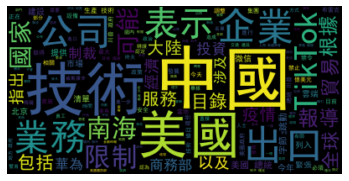

In [32]:
#不同字型
wordcloud = WordCloud(font_path='fonts/SimHei.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

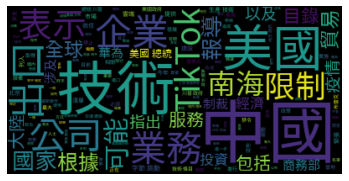

In [33]:
#不同字型
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [34]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'白宮': 2,
         '幕僚長': 1,
         '梅杜斯': 1,
         '1': 5,
         '日': 13,
         '說': 12,
         '，': 225,
         '參議院': 1,
         '共和黨人': 1,
         '可能': 10,
         '考慮': 2,
         '提出': 1,
         '約': 2,
         '5000': 1,
         '億美元': 5,
         '美元': 2,
         '的': 136,
         '刺激': 1,
         '法案': 1,
         '目前': 5,
         '雖': 3,
         '跟': 2,
         '一些': 1,
         '民主黨人': 1,
         '談判': 3,
         '取得': 5,
         '進展': 1,
         '但': 9,
         '為': 13,
         '州': 6,
         '與': 11,
         '地方': 5,
         '政府': 10,
         '籌募': 1,
         '資金': 3,
         '仍': 4,
         '是': 20,
         '中': 6,
         '最大': 5,
         '阻礙': 2,
         '。': 102,
         '民主黨': 1,
         '一直': 1,
         '爭取': 1,
         '近': 4,
         '兆': 1,
         '來': 5,
         '幫助': 1,
         '受': 2,
         '疫情': 7,
         '影響': 2,
         '財政': 2,
         '但梅': 1,
         '杜斯向': 1,
         'CNBC': 2,
   

In [35]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

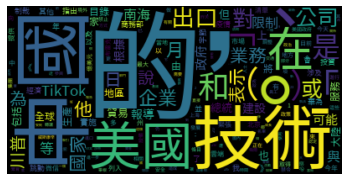

In [36]:
#沒有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

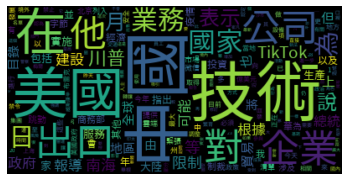

In [37]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### [其他] 用dataframe 處理數據

In [38]:
seg_df = pd.DataFrame(seg_words_list, columns=['seg_word'])
seg_df

,seg_word
0,白宮
1,幕僚長
2,梅杜斯
3,1
4,日
...,...
3325,資源
3326,的
3327,行為
3328,。


In [39]:
seg_df['count'] = 1
seg_freq_df = seg_df.groupby('seg_word').sum()
seg_freq_df

,count
seg_word,
,16
",",2
--,2
----,1
1,5
...,...
（,24
）,24
，,225


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12298 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_a

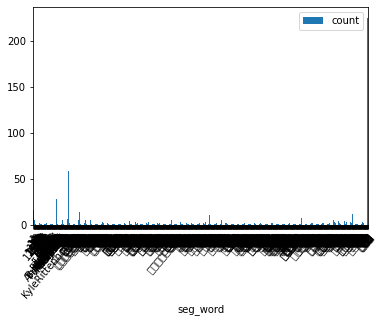

In [40]:
seg_df.groupby('seg_word').sum().plot.bar()
plt.xticks(rotation=50)
plt.show()

### [其他] parse html 小筆記

In [41]:
import requests
from lxml import etree
import jieba
from io import StringIO
import pandas as pd

for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url)
    #print(r.status_code == 200)
    if r.status_code == 200:
        html_tree = etree.HTML(r.text)
        print(html_tree)
        html_ele = html_tree.xpath('//article//p')
        all_ele = [ (ele.text.strip()) for ele in html_ele if type(ele.text) is str ]
        all_ele_string = ''.join(all_ele)
        seg_words = jieba.lcut(all_ele_string)
        seg_df = pd.DataFrame(seg_words, columns=['seg_word'])
        seg_df['count'] = 1
        print(seg_df)

https://money.udn.com/money/story/10511/4827529
<Element html at 0x7f78cae2d230>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4827373
<Element html at 0x7f78c4f4cf00>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4825705
<Element html at 0x7f78c5dedfa0>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4825558
<Element html at 0x7f78c5de6960>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4821656
<Element html at 0x7f78c4f559b0>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4821544
<Element html at 0x7f78c5de6780>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4820610
<Element html at 0x7f78cb6917d0>
Empty DataFrame
Columns: [seg_word, count]
Index: []
https://money.udn.com/money/story/10511/4819075
<Element html 